In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
U=[300,280,260,240,220,200] # [V]
R=[0.032,0.042,0.0511] # [cm]
I_h3=[2.53,2.34,2.21,2.09,1.89,1.74] # [A]
I_h4=[1.91,1.82,1.67,1.57,1.44,1.34] # [A]
I_h5=[1.54,1.49,1.41,1.33,1.23,1.12] # [A]
k=0.756 # [mT/A]
Bs3=[]
Bs4=[]
Bs5=[]

In [76]:
# para 5cm
for c in range(0,6):
    B5=k*I_h5[c]
    Bs5.append(B5)
print(Bs5)
# para 4cm
for c in range(0,6):
    B4=k*I_h4[c]
    Bs4.append(B4)
print(Bs4)
# para 3cm
for c in range(0,6):
    B3=k*I_h3[c]
    Bs3.append(B3)
print(Bs3)

[1.16424, 1.12644, 1.06596, 1.0054800000000002, 0.92988, 0.8467200000000001]
[1.44396, 1.37592, 1.2625199999999999, 1.18692, 1.08864, 1.0130400000000002]
[1.91268, 1.76904, 1.67076, 1.58004, 1.4288399999999999, 1.31544]


In [77]:
B_5=[1.16424e-3, 1.12644e-3, 1.06596e-3, 1.0054800000000002e-3, 0.92988e-3,0.8467200000000001e-3] # [T]
B_4=[1.44396e-3, 1.37592e-3, 1.2625199999999999e-3, 1.18692e-3, 1.08864e-3,1.0130400000000002e-3] # [T]
B_3=[1.91268e-3, 1.76904e-3, 1.67076e-3, 1.58004e-3, 1.4288399999999999e-3,1.31544e-3] # [T]


# **R = 5 cm**

In [177]:
em5s=[]
for z in range(0,6):
    em5=2.0*U[z]/(0.0511*B_5[z])**2
    em5s.append(em5)
em55=np.mean(em5s)*10**(-11)

In [178]:
print(em55)

1.840274215770952


# **R = 4 cm**

In [181]:
em4s=[]
for z in range(0,6):
    em4=2.0*U[z]/(0.042*B_4[z])**2
    em4s.append(em4)
em44=np.mean(em4s)*10**(-11)

In [182]:
print(em44)

1.9005628515870825


# **R = 3 cm**

In [183]:
em3s=[]
for z in range(0,6):
    em3=2.0*U[z]/(0.032*B_3[z])**2
    em3s.append(em3)
em33=np.mean(em3s)*10**(-11)

In [184]:
print(em33)

1.9013403408827492


In [ ]:
prom=(em55+em33+em44)/3
print(prom)
teo=1.75e11
def error(teos,exp):
    return np.abs(teos-exp)*100/teos
print(error(teo,prom))

1.8807258027469278
7.470045871253016


In [290]:
y=[600,560,520,480,440,400]
b52=[]
for j in range(0,6):
    cuadrao5=B_5[j]**(2) *0.043**2  
    b52.append(cuadrao5)

b42=[]
for j in range(0,6):
    cuadrao4=B_4[j]**(2) * 0.034**2
    b42.append(cuadrao4)
b32=[]
for j in range(0,6):
    cuadrao3=B_3[j]**(2) * 0.026**2
    b32.append(cuadrao3)


In [291]:
# Ajuste lineal 5cm
coeficientes5= np.polyfit(b52, y, 1)  # Grado 1: recta
m5, b5 = coeficientes5

print(f"La mejor ecuación lineal es: y = {m5:.4f}x + {b5:.4f}")
print(error(teo,m5*10**(-11)))

# Ajuste lineal 4cm
coeficientes4 = np.polyfit(b42, y, 1)  # Grado 1: recta
m4, b4 = coeficientes4

print(f"La mejor ecuación lineal es: y = {m4:.4f}x + {b4:.4f}")
print(error(teo,m4*10**(-11)))

# Ajuste lineal 3cm
coeficientes3 = np.polyfit(b32, y, 1)  # Grado 1: recta
m3, b3 = coeficientes3

print(f"La mejor ecuación lineal es: y = {m3:.4f}x + {b3:.4f}")
print(error(teo,m3*10**(-11)))

La mejor ecuación lineal es: y = 166130291056.9269x + 174.7430
5.06840511032749
La mejor ecuación lineal es: y = 158219621844.0390x + 219.7852
9.588787517692003
La mejor ecuación lineal es: y = 155842625196.3886x + 221.7404
10.947071316349367


In [306]:
hola5=b52*1.7594e11


TypeError: can't multiply sequence by non-int of type 'float'

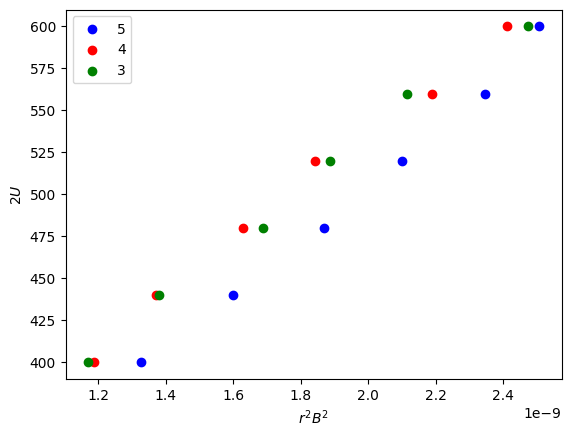

In [307]:
plt.scatter(b52,y,label="5",color="blue")
plt.scatter(b42,y,label="4",color="red")
plt.scatter(b32,y,label="3",color="green")
plt.xlabel(r"$r^2B^2$");plt.ylabel(r"$2U$")
plt.legend()